In [1]:
import pandas as pd
import numpy as np

# Load the datasets
df1 = pd.read_csv("C:\\Users\\drago\\OneDrive\\Desktop\\New Task data cleaning\\user_interactions.csv")
df2 = pd.read_csv("C:\\Users\\drago\\OneDrive\\Desktop\\New Task data cleaning\\purchase_data.csv")
df3 = pd.read_csv("C:\\Users\\drago\\OneDrive\\Desktop\\New Task data cleaning\\website_performance.csv")


In [2]:
df1

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391
...,...,...,...
4995,User_3045,Checkout Page,284
4996,User_1583,Cart Page,322
4997,User_2627,Checkout Page,559
4998,User_4976,Product Page,373


In [3]:
df2

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,Purchase_948,User_3840,Product_19,62.843031,2023-04-02 16:35:46
1,Purchase_905,User_1846,Product_9,21.780079,2023-04-14 16:38:27
2,Purchase_704,User_1700,Product_8,138.264455,2023-01-21 11:21:31
3,Purchase_766,User_4117,Product_15,74.991367,2023-01-29 04:44:04
4,Purchase_36,User_3053,Product_7,162.569998,2023-05-24 03:30:23
...,...,...,...,...,...
995,Purchase_489,User_2879,Product_14,47.047885,2023-04-10 17:38:54
996,Purchase_741,User_588,Product_1,85.587089,2023-02-19 15:05:57
997,Purchase_587,User_3821,Product_16,162.919467,2023-07-14 23:15:18
998,Purchase_222,User_1804,Product_10,44.435545,2023-03-03 15:37:35


In [4]:
df3

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525
5,2023-06-01,7.333456,0.440715,0.048687
6,2023-07-01,3.372264,0.390081,0.048440
7,2023-08-01,7.115272,0.489165,0.038263
8,2023-09-01,8.384957,0.301692,0.063365
9,2023-10-01,2.468395,0.566843,0.065971


In [5]:
#df1.info()

In [6]:
#df2.info()

In [7]:
#df3.info()

In [8]:
#df1.isnull().sum()

In [9]:
#df2.isnull().sum()

In [10]:
df3.isnull().sum()

Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64

In [11]:
df1.dtypes

User_ID               object
Page_Viewed           object
Time_Spent_Seconds     int64
dtype: object

In [12]:
df2.dtypes

Purchase_ID            object
User_ID                object
Product_ID             object
Transaction_Amount    float64
Purchase_Time          object
dtype: object

In [13]:
df3.dtypes

Month               object
Page_Load_Time     float64
Bounce_Rate        float64
Conversion_Rate    float64
dtype: object

In [14]:
#df3['page_load_time'] = df3['page_load_time'].astype(float)

In [15]:
#df3['bounce_rate'] = df3['bounce_rate'].astype(float)
#df3['conversion_rate'] = df3['conversion_rate'].astype(float)

<AxesSubplot:>

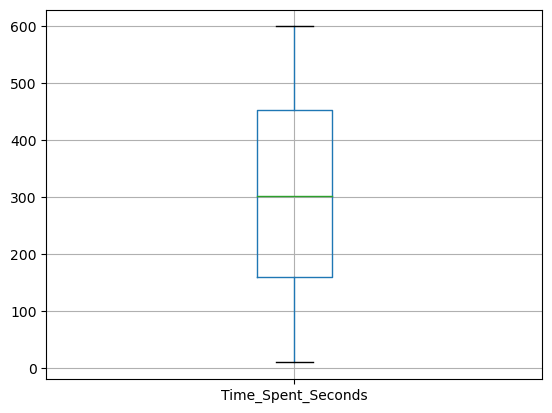

In [16]:
df1.boxplot(column='Time_Spent_Seconds')

In [17]:
df2['Purchase_Time'] = pd.to_datetime(df2['Purchase_Time'])

In [18]:
# Step 3: Calculate Z-score for outlier detection
z_score = np.abs((df1['Time_Spent_Seconds'] - df1['Time_Spent_Seconds'].mean()) / df1['Time_Spent_Seconds'].std())

# Set a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3
outliers_zscore = df1[z_score > threshold]

In [19]:
# Step 4: Calculate IQR for outlier detection
Q1 = df1['Time_Spent_Seconds'].quantile(0.25)
Q3 = df1['Time_Spent_Seconds'].quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Set a threshold for identifying outliers using IQR (e.g., Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df1[(df1['Time_Spent_Seconds'] < lower_bound) | (df1['Time_Spent_Seconds'] > upper_bound)]

# Step 5: Calculate the Modified Z-score using Median Absolute Deviation (MAD)
mad = np.abs(df1['Time_Spent_Seconds'] - df1['Time_Spent_Seconds'].median()).median()
modified_z_score = np.abs(0.6745 * (df1['Time_Spent_Seconds'] - df1['Time_Spent_Seconds'].median()) / mad)

# Set a threshold for identifying outliers using Modified Z-score (e.g., Modified Z-score > 3.5)
modified_threshold = 3.5
outliers_modified_zscore = df1[modified_z_score > modified_threshold]

# Step 6: Use other outlier detection methods if needed (e.g., DBSCAN, Isolation Forest, LOF, One-Class SVM)

# Print the identified outliers for each method
print("Outliers using Z-Score:")
print(outliers_zscore)

print("Outliers using IQR Method:")
print(outliers_iqr)

print("Outliers using Modified Z-Score:")
print(outliers_modified_zscore)

Outliers using Z-Score:
Empty DataFrame
Columns: [User_ID, Page_Viewed, Time_Spent_Seconds]
Index: []
Outliers using IQR Method:
Empty DataFrame
Columns: [User_ID, Page_Viewed, Time_Spent_Seconds]
Index: []
Outliers using Modified Z-Score:
Empty DataFrame
Columns: [User_ID, Page_Viewed, Time_Spent_Seconds]
Index: []


In [21]:
# Most visited pages and average time spent on each page
most_visited_pages = df1['Page_Viewed'].value_counts()
most_visited_pages 


Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64

In [22]:
# Click-through rate for different sections of the website
click_through_rate = df1['Page_Viewed'].value_counts(normalize=True)
click_through_rate

Homepage         0.2090
Cart Page        0.2082
Checkout Page    0.1978
Category Page    0.1944
Product Page     0.1906
Name: Page_Viewed, dtype: float64

In [23]:
average_time_spent = df1.groupby('Page_Viewed')['Time_Spent_Seconds'].mean()
average_time_spent


Page_Viewed
Cart Page        302.819404
Category Page    297.839506
Checkout Page    306.760364
Homepage         310.215311
Product Page     304.562434
Name: Time_Spent_Seconds, dtype: float64

In [24]:
# Overall conversion rate for the website
conversion_rate = len(df2) / len(df1)

# Top-selling products and product categories
top_selling_products = df2['Product_ID'].value_counts()
top_selling_categories = df2.merge(df1, on='User_ID').groupby('Page_Viewed')['Product_ID'].value_counts()


In [25]:
# Perform cohort analysis based on sign-up dates


# Calculate lifetime value (LTV) of customers acquired during different time periods
df2['Purchase_Month'] = df2['Purchase_Time'].dt.to_period('M')
df2['Transaction_Revenue'] = df2['Transaction_Amount']
ltv_per_cohort = df2.groupby('Purchase_Month')['Transaction_Revenue'].sum()

In [26]:
# Analyze website performance metrics
average_bounce_rate = df3['Bounce_Rate'].mean()
average_conversion_rate = df3['Conversion_Rate'].mean()

# Propose strategies for improvement
# Example: Identify months with high bounce rates and conversion rates for optimization
high_bounce_rate_months = df3[df3['Bounce_Rate'] > 0.5]
high_conversion_rate_months = df3[df3['Conversion_Rate'] > 0.1]


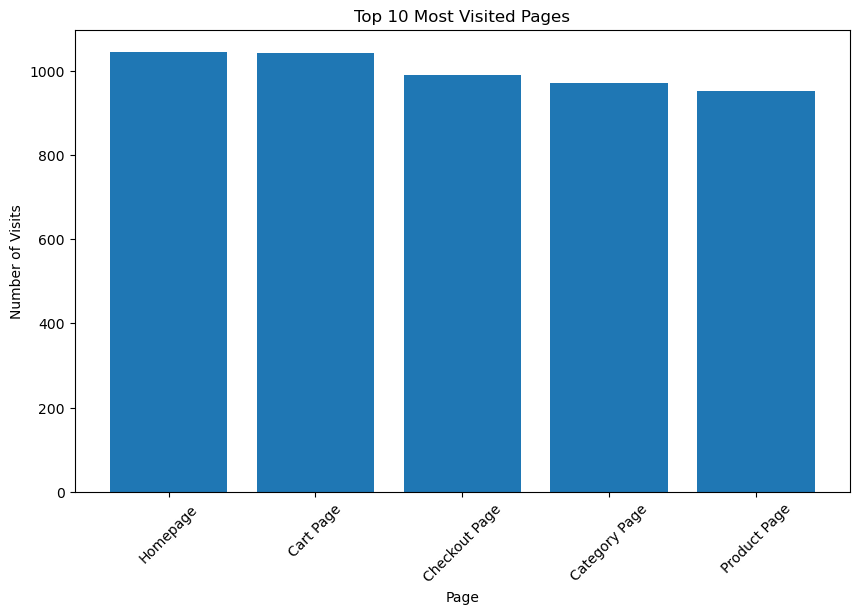

In [27]:
import matplotlib.pyplot as plt

# Most visited pages bar chart
most_visited_pages = df1['Page_Viewed'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(most_visited_pages.index, most_visited_pages.values)
plt.xlabel('Page')
plt.ylabel('Number of Visits')
plt.title('Top 10 Most Visited Pages')
plt.xticks(rotation=45)
plt.show()


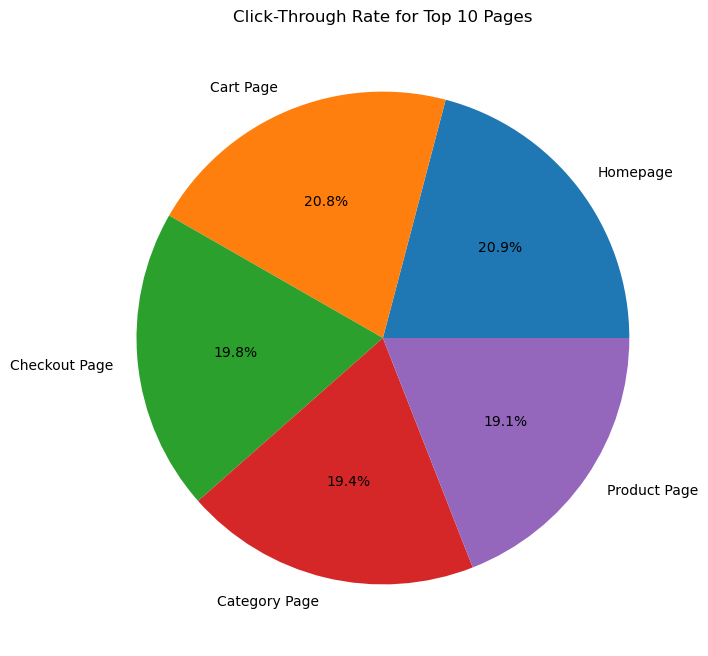

In [28]:


# Click-through rate for different sections of the website pie chart
click_through_rate = df1['Page_Viewed'].value_counts(normalize=True).nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(click_through_rate.values, labels=click_through_rate.index, autopct='%1.1f%%')
plt.title('Click-Through Rate for Top 10 Pages')
plt.show()


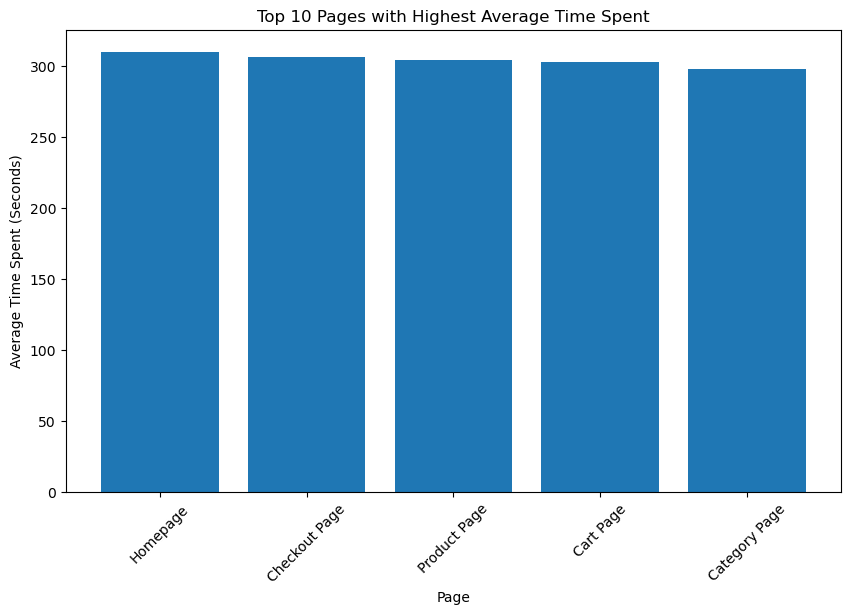

In [29]:

# Average time spent on each page bar chart
average_time_spent = df1.groupby('Page_Viewed')['Time_Spent_Seconds'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(average_time_spent.index, average_time_spent.values)
plt.xlabel('Page')
plt.ylabel('Average Time Spent (Seconds)')
plt.title('Top 10 Pages with Highest Average Time Spent')
plt.xticks(rotation=45)
plt.show()

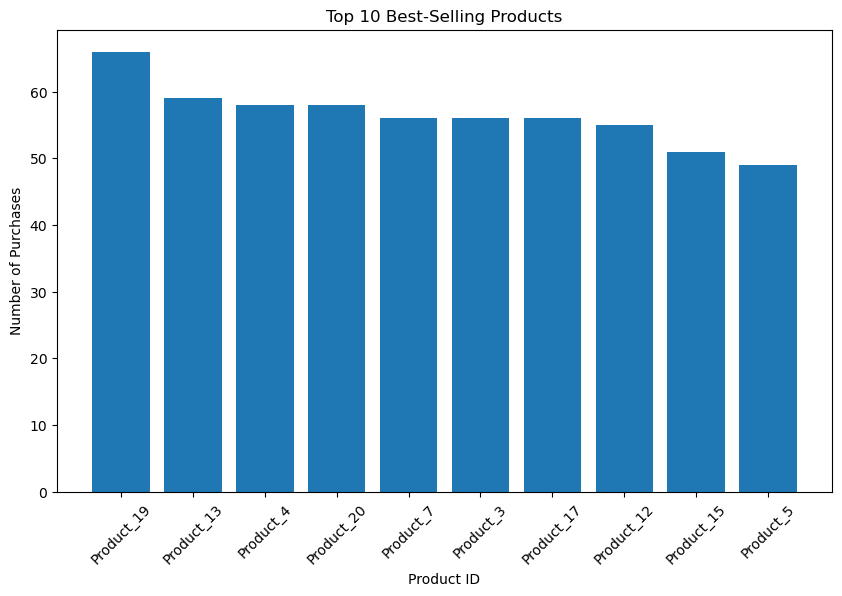

TypeError: 'value' must be an instance of str or bytes, not a tuple

In [30]:
# Top-selling products bar chart
top_selling_products = df2['Product_ID'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(top_selling_products.index, top_selling_products.values)
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.show()

# Product categories with the most purchases bar chart
top_selling_categories = df2.merge(df1, on='User_ID').groupby('Page_Viewed')['Product_ID'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(top_selling_categories.index, top_selling_categories.values)
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.title('Top 10 Best-Selling Product Categories')
plt.xticks(rotation=45)
plt.show()
